# Finloop PV segmentation

source (Huggingface): finloop/yolov8s-seg-solar-panels (aka Rzeszów model)

credits: https://blog.roboflow.com/how-to-use-yolov8-with-sam/ (Roboflow)

VI 25 with changes 15 X 25, 9 XI 25 and on

*MD*

note: a dual-use model (detection + instance segmentation)

requires OBB-versioned datasets

## libs

In [1]:
# %pip install numpy
# %pip install pandas
# %pip install ultralytics

In [2]:
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO
import torch

## defs

### data

In [3]:
pilot = "pilotPV_panels.v1i.yolov8-obb/data.yaml"
rzeszow = "rzeszowSolar panels seg.v2i.yolov8-obb/data.yaml"
synth = 'auto_pv_to_fine_tunning.v4i.yolov8-obb/data.yaml'

In [4]:
proste_1_zdj = "rzeszowSolar panels seg.v2i.yolov8-obb/test/images/022_jpg.rf.f76ab3a091f7c7931d2c26cc7375842b.jpg"

data_p = proste_1_zdj
pth = proste_1_zdj
nazwa = "proste_1_zdj"

### model

In [5]:
model_pt = "best.pt"

In [6]:
model = YOLO(model=model_pt, task="segment", verbose=True)

### segment analysis

In [7]:
def sum_pv_segments(imgs, nazwa, model=model, disp_img=False, print_info=False):
    pv_area = 0
    results = model.predict(imgs, save=True, name=nazwa)
    for i, res in enumerate(results):
        if print_info:
            print(i)
        for j, msk in enumerate(res.masks):
            binary_mask = torch.where(msk.data > 0.5, 1, 0)
            # dims = binary_mask.size()
            # print(dims)
            pv_area += binary_mask.sum().div(640*640)
            if print_info:
                print('\t', j, binary_mask)
            if disp_img:
                binary_mask = binary_mask.data
                pth = imgs if isinstance(imgs, str) else imgs[i]
                # print(pth)
                image = cv2.cvtColor(cv2.imread(pth), cv2.COLOR_BGR2RGB)
                image = torch.tensor(image, device=torch.get_device(binary_mask))
                bcg_white = torch.ones_like(image)*255
                new_image = bcg_white * (1 - binary_mask[..., torch.newaxis]) + image * binary_mask[..., torch.newaxis]
                plt.imshow(new_image.reshape((640, 640, 3)).cpu())
                plt.title(f"Mask {j}")
                plt.axis('off')
                plt.show()
        if print_info:
            print(pv_area.item())
    if disp_img:
        image = cv2.cvtColor(cv2.imread(pth), cv2.COLOR_BGR2RGB)
        plt.imshow(image.reshape((640, 640, 3)))
        plt.title("base img")
        plt.axis('off')
        plt.show()
    return pv_area

## segment

### numbers

jeden obraz

In [8]:
sumka = sum_pv_segments(data_p, "proste_funk")
sumka


image 1/1 /home/marekd6/ZPB/modelling/modelling/rzeszowSolar panels seg.v2i.yolov8-obb/test/images/022_jpg.rf.f76ab3a091f7c7931d2c26cc7375842b.jpg: 640x640 4 solar-panels, 24.3ms
Speed: 3.3ms preprocess, 24.3ms inference, 195.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/proste_funk


tensor(0.0971, device='cuda:0')

podwójnie

In [9]:
sum_pv_segments([data_p,data_p], "proste_funk_podwojnie")


0: 640x640 4 solar-panels, 32.2ms
1: 640x640 4 solar-panels, 32.2ms
Speed: 2.1ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/proste_funk_podwojnie


tensor(0.1942, device='cuda:0')

### imgs


image 1/1 /home/marekd6/ZPB/modelling/modelling/rzeszowSolar panels seg.v2i.yolov8-obb/test/images/022_jpg.rf.f76ab3a091f7c7931d2c26cc7375842b.jpg: 640x640 4 solar-panels, 25.9ms
Speed: 1.5ms preprocess, 25.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/proste_funk2


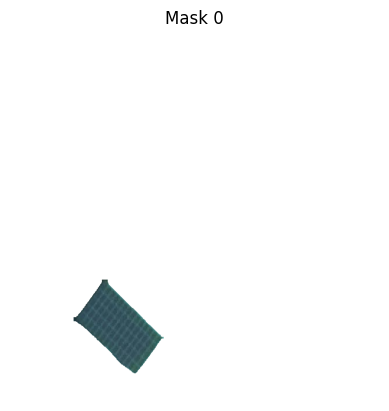

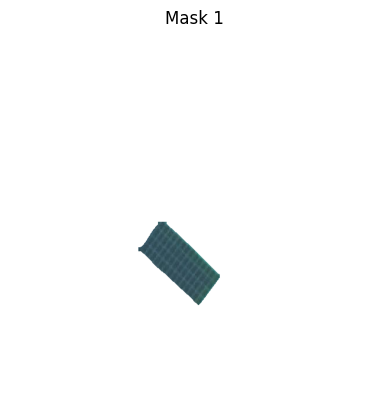

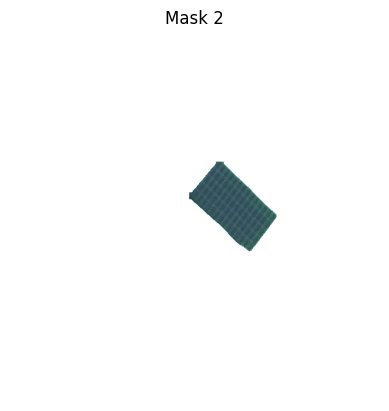

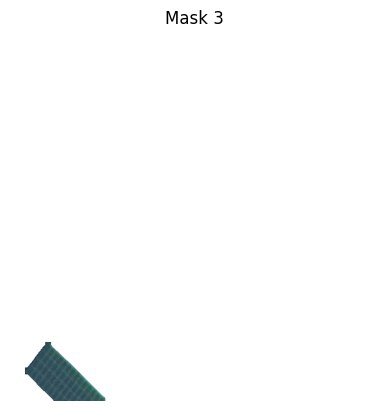

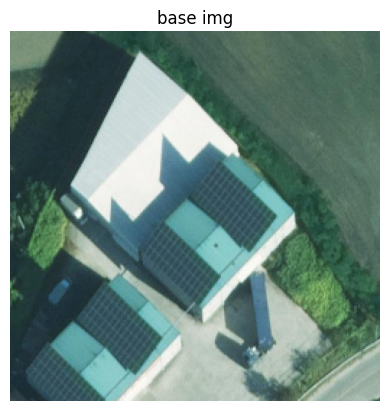

tensor(0.0971, device='cuda:0')

In [10]:
sum_pv_segments(data_p, "proste_funk", disp_img=True)


0: 640x640 4 solar-panels, 23.8ms
1: 640x640 4 solar-panels, 23.8ms
Speed: 1.4ms preprocess, 23.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/proste_funk_podwojnie2


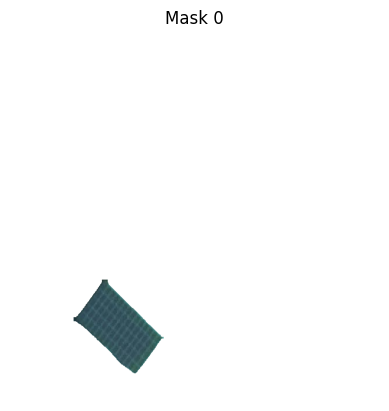

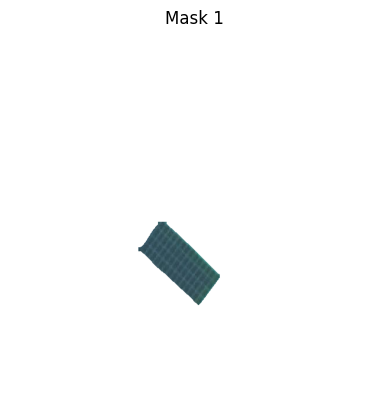

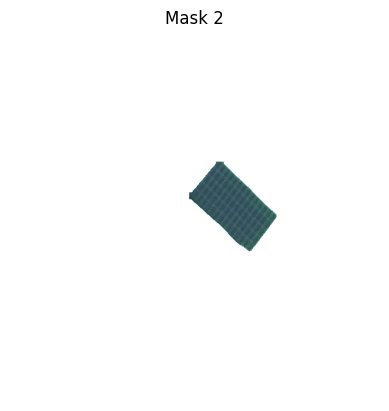

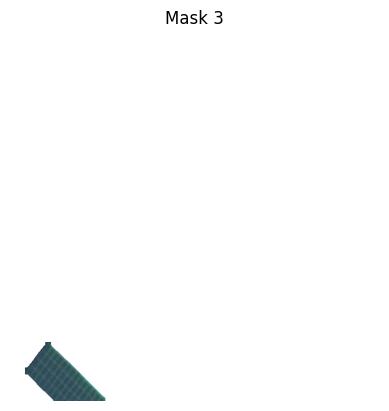

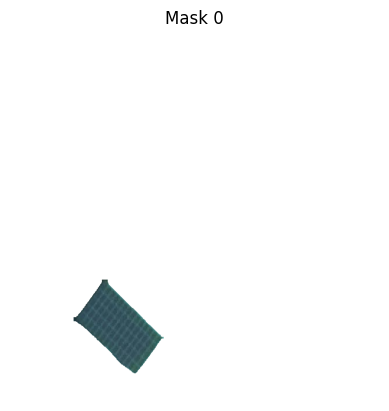

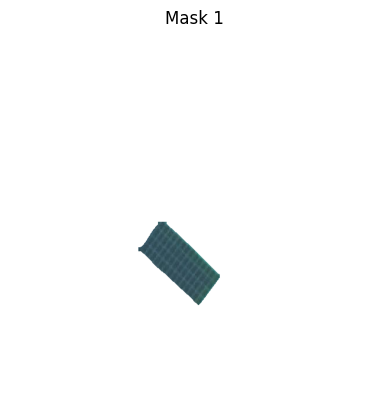

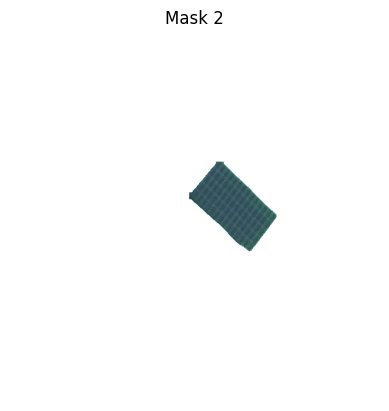

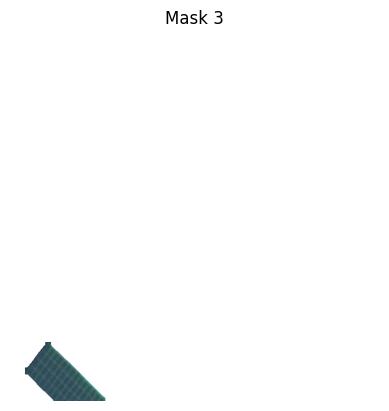

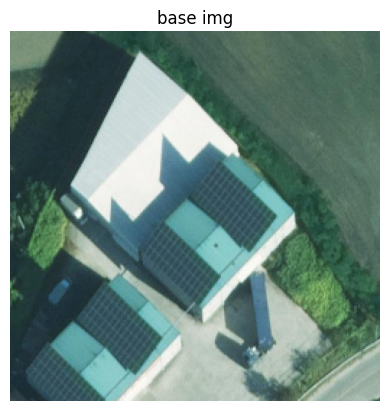

tensor(0.1942, device='cuda:0')

In [11]:
sum_pv_segments([data_p,data_p], "proste_funk_podwojnie", disp_img=True)